In [1]:
%matplotlib inline

#### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

In [3]:
sns.set() # setting seaborn style to default

## 1. Read the column distrubution and ensure you understand each attribute well

In [4]:
bloan = pd.read_csv('Bank_Personal_Loan_Modelling.csv') # read the data in the file into dataframe bloan

In [5]:
bloan.head() # checking the head of dataframe

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
bloan.info() #info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bloan.isna().apply(pd.value_counts) #checking for null value

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


#### There are no null values in the data

In [8]:
bloan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### - All columns looks legit except Experience column since it contains negative values. A person cannot have negative experience
### - Looking at age column, it can be concluded that data represent adult population with 75% less than or equal to 55 years of age
### - Income of the customers range from \\$32000 to \\$224000 . There is possibility of outliers as 75% have income less than or equal to \\$98000. The data is skewed.
### - Family size of the customers range from 1 to 4 members with 75% of customers having 3 or less family members.
### - The Average spending on Credit card per month and Mortage columns are highly skewed.
### - 25% of customes are undergraduate
### - 75% of customers did not accept the personal loan offered in the last campaign
### - 75% of customers do not have Securities account and CD account with the bank
### - Atleast 50% of customers use Internet banking facilities
### - 50% of customers do not use the Credit card issued by Universal Bank

In [9]:
# replacing categorical var with actual values for Education column
bloan['Education']=bloan['Education'].replace({1:'Undergrad',2:'Graduate',3:'Advanced/Professional'})
bloan.Education.value_counts()

Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64

In [10]:
#replacing categorical var with actual value for Personal Loan column
bloan['Personal Loan']=bloan['Personal Loan'].replace({1:'Yes',0:'No'})
print("% of customers accepted to take Personal Loan is ", (len(bloan[bloan['Personal Loan'] =='Yes']['ID'])/len(bloan['Personal Loan']))*100)

% of customers accepted to take Personal Loan is  9.6


### 9.6% of customers have accepted the personal loan which confirms our earlier analysis of 75% of customers not accepting personal loan

In [11]:
#replacing categorical var with actual value for Securities Account column
bloan['Securities Account']=bloan['Securities Account'].replace({1:'Yes',0:'No'})
print("% of customers having Securities account is ", (len(bloan[bloan['Securities Account'] =='Yes']['ID'])/len(bloan['Securities Account']))*100)

% of customers having Securities account is  10.440000000000001


### 10.4% of customers have Securities Account with the bank which confirms our earlier analysis of 75% of customers not having Securities Account with the bank

In [12]:
#replacing categorical var with actual value for CD Account column
bloan['CD Account']=bloan['CD Account'].replace({1:'Yes',0:'No'})
print("% of customers having CD account is ", (len(bloan[bloan['CD Account'] =='Yes']['ID'])/len(bloan['CD Account']))*100)

% of customers having CD account is  6.04


### 6.04% of customers have CD Account with the bank which confirms our earlier analysis of 75% of customers not having CD Account with the bank

In [13]:
#replacing categorical var with actual value for Online column
bloan['Online']=bloan['Online'].replace({1:'Yes',0:'No'})
print("% of customers having Internet banking facility is ", (len(bloan[bloan['Online'] =='Yes']['ID'])/len(bloan['Online']))*100)

% of customers having Internet banking facility is  59.68


### 59.68% of customers have internet banking facilities with the bank which confirms our earlier analysis of atleast 50% of customers using internet banking faciilities

In [14]:
#replacing categorical var with actual value for CreditCard column
bloan['CreditCard']=bloan['CreditCard'].replace({1:'Yes',0:'No'})
print("% of customers not having Credit Card is ", (len(bloan[bloan['CreditCard'] =='No']['ID'])/len(bloan['CreditCard']))*100)

% of customers not having Credit Card is  70.6


### 70.6% of customers do not use the Credit Card issued by Universal bank which confirms our earlier analysis of 50% of customers not using Universal Bank Credit card

In [15]:
# dealing data having negative values in Experience Column
bloan[bloan['Experience'] < 0]['Experience'].count() #Total of 52 columns have negative values

52

In [16]:
bloan['Experience']=bloan['Experience'].replace({-1:0,-2:0,-3:0,0:0}) #replacing negative values with zero

In [17]:
# Customer is not evaluated for personal loan based on zipcode and ID, hence it can be dropped
bloan = bloan.drop(['ZIP Code','ID'],axis=1)

## 2. Study the data distribution in each attribute, share your findings

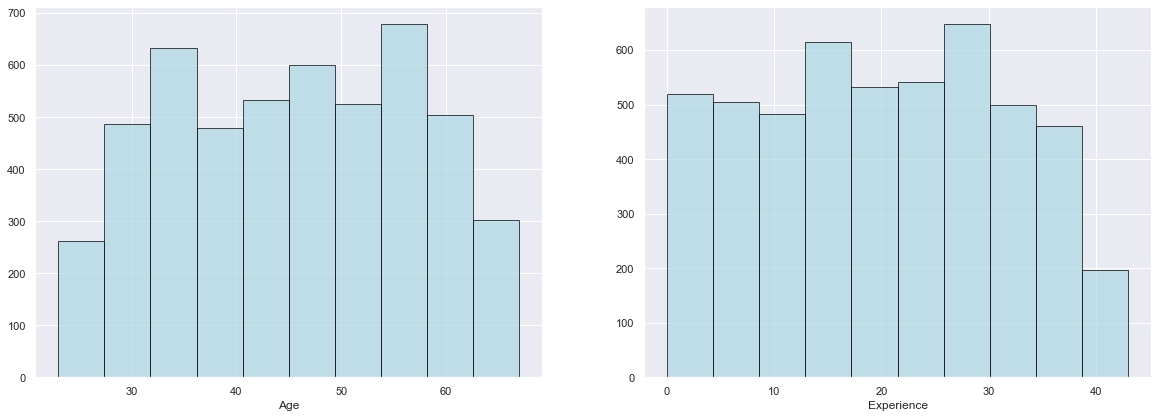

In [18]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(bloan.Age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.hist(bloan.Experience, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.show()

### Age and Experience are distributed uniformly

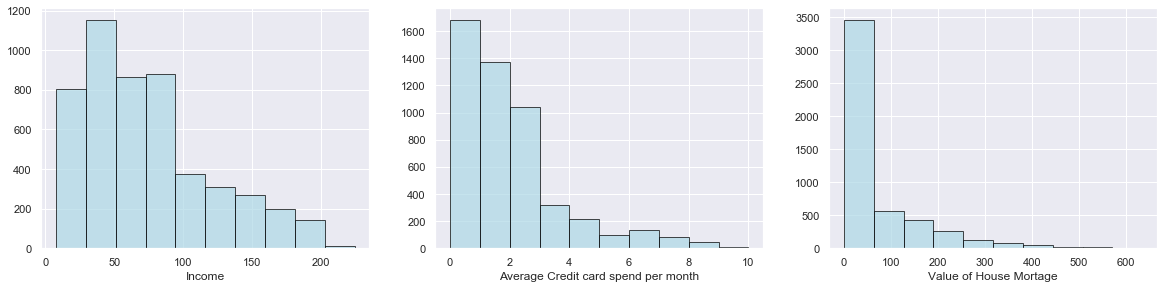

In [19]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(bloan.Income, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(3,3,2)
plt.hist(bloan.CCAvg, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Average Credit card spend per month')

plt.subplot(3,3,3)
plt.hist(bloan.Mortgage, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Value of House Mortage')
plt.show()

### Income distributed has skewness

### Average Credit card Spend per month and value of House mortgage are highly skewed, as seen in the previous step

In [20]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bloan.Age),stats.skew(bloan.Experience),stats.skew(bloan.Income),stats.skew(bloan.CCAvg),stats.skew(bloan.Mortgage)]},
                        index=['Age','Experience','Income','CreditCard Avg','Mortgage'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Age,-0.029332
Experience,-0.017216
Income,0.841086
CreditCard Avg,1.597964
Mortgage,2.103371


### Both Age and No of years of Experience is uniformly distributed as there is hardly any skew. 
### Skew of Income is less.
### Credit card average spending per month and Mortgage are highly skewed

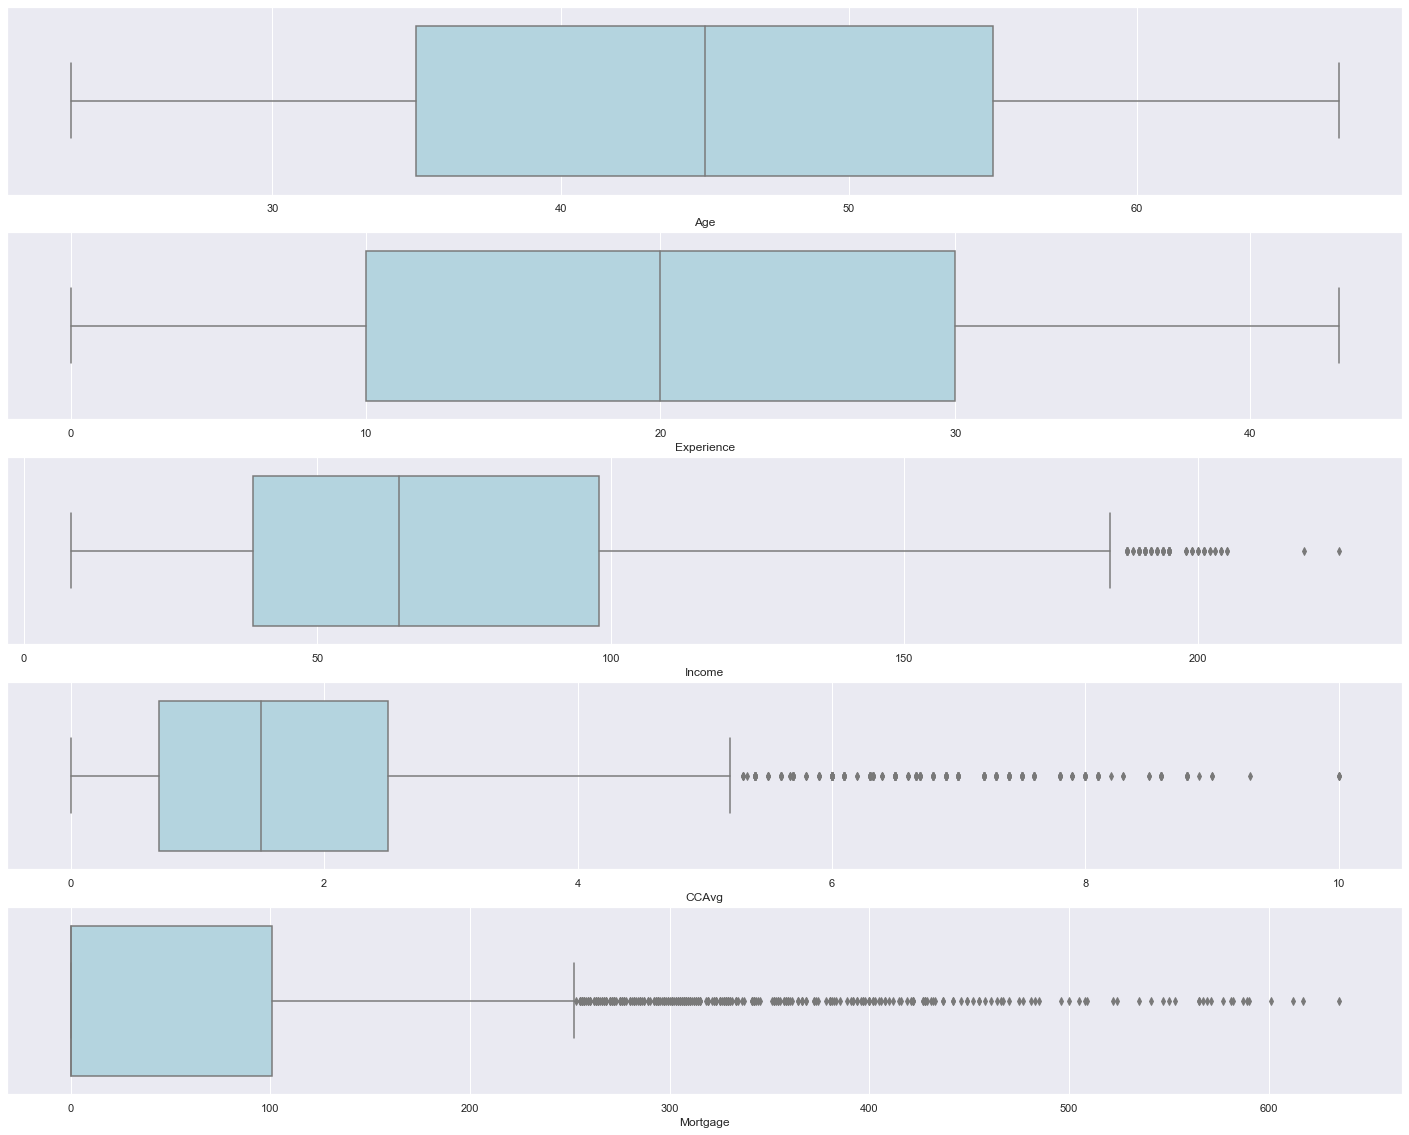

In [21]:
plt.figure(figsize= (25,20))
plt.subplot(5,1,1)
sns.boxplot(x= bloan.Age, color='lightblue')

plt.subplot(5,1,2)
sns.boxplot(x= bloan.Experience, color='lightblue')

plt.subplot(5,1,3)
sns.boxplot(x= bloan.Income, color='lightblue')

plt.subplot(5,1,4)
sns.boxplot(x= bloan.CCAvg, color='lightblue')

plt.subplot(5,1,5)
sns.boxplot(x= bloan.Mortgage, color='lightblue')

plt.show()

### - Income has a some extreme values
### - Credit card average spending per month and Mortgage being highly skewed have lot of extreme values

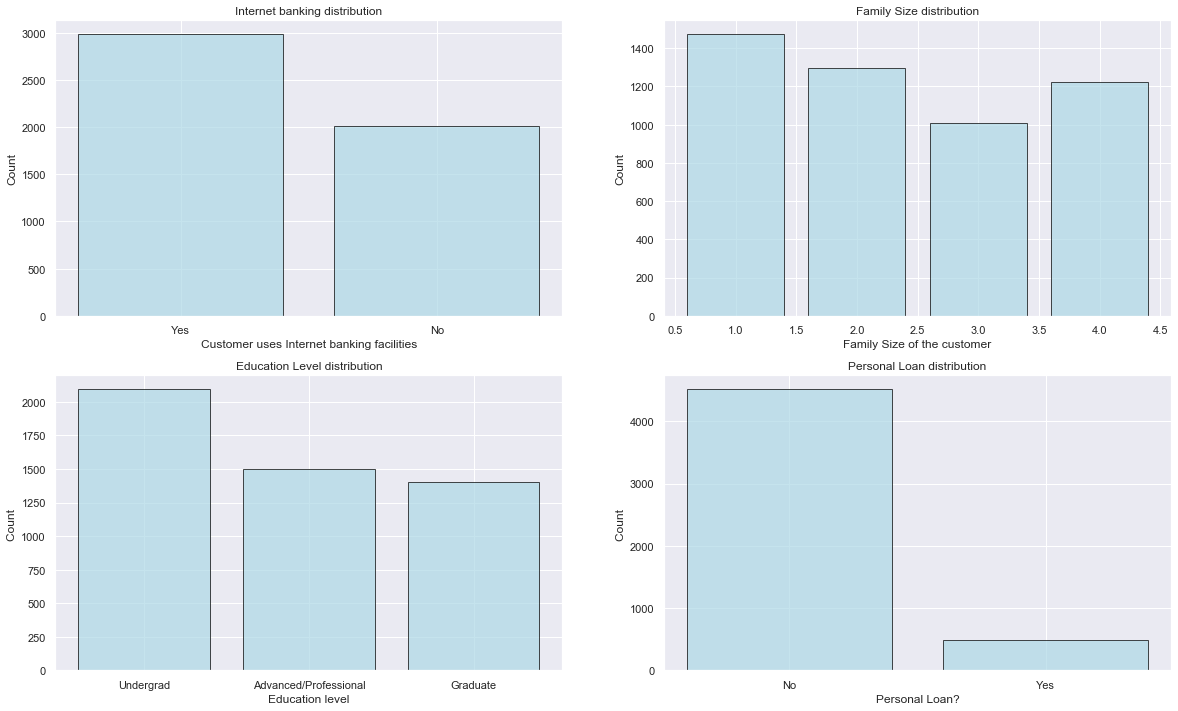

In [22]:
plt.figure(figsize=(20,25))


x = bloan.Online.value_counts().index    #Values for x-axis
y = [bloan['Online'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Customer uses Internet banking facilities')
plt.ylabel('Count')
plt.title('Internet banking distribution')

x1 = bloan.Family.value_counts().index    #Values for x-axis
y1 = [bloan['Family'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Family Size of the customer')
plt.ylabel('Count')
plt.title('Family Size distribution')

x2 = bloan.Education.value_counts().index    #Values for x-axis
y2 = [bloan['Education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Education level')
plt.ylabel('Count ')
plt.title("Education Level distribution")

x3 = bloan['Personal Loan'].value_counts().index    #Values for x-axis
y3 = [bloan['Personal Loan'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan?')
plt.ylabel('Count ')
plt.title("Personal Loan distribution")

plt.show()

### - Customers using Internet banking facilities is more than the customers those who don't use
### - The number of Undergrad is more than the Graduated and Advanced/Professionals.
### - Customers not accepting personal loan more than the acceptors

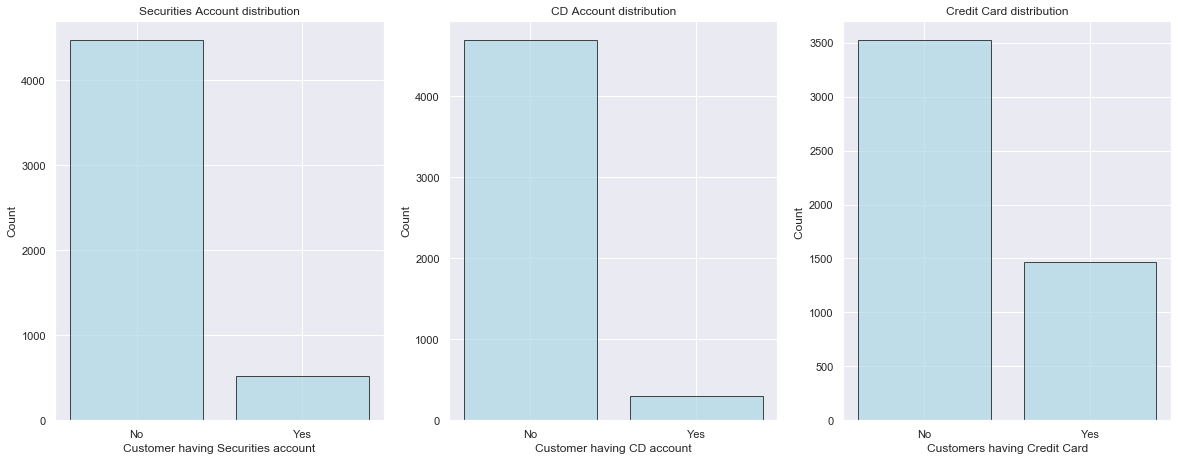

In [23]:
plt.figure(figsize=(20,25))


x = bloan['Securities Account'].value_counts().index    #Values for x-axis
y = [bloan['Securities Account'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(3,3,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Customer having Securities account')
plt.ylabel('Count')
plt.title('Securities Account distribution')

x1 = bloan['CD Account'].value_counts().index    #Values for x-axis
y1 = [bloan['CD Account'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(3,3,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Customer having CD account')
plt.ylabel('Count')
plt.title('CD Account distribution')

x2 = bloan['CreditCard'].value_counts().index    #Values for x-axis
y2 = [bloan['CreditCard'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(3,3,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Customers having Credit Card')
plt.ylabel('Count ')
plt.title("Credit Card distribution")


plt.show()

### - Customers not having Securities Account is more than the customers having the same
### - Customers not having Certificate of Deposit(CD) Account is more than the customers having the same
### - Customers not using Credit card of Universal Bank is more than the customers having the same

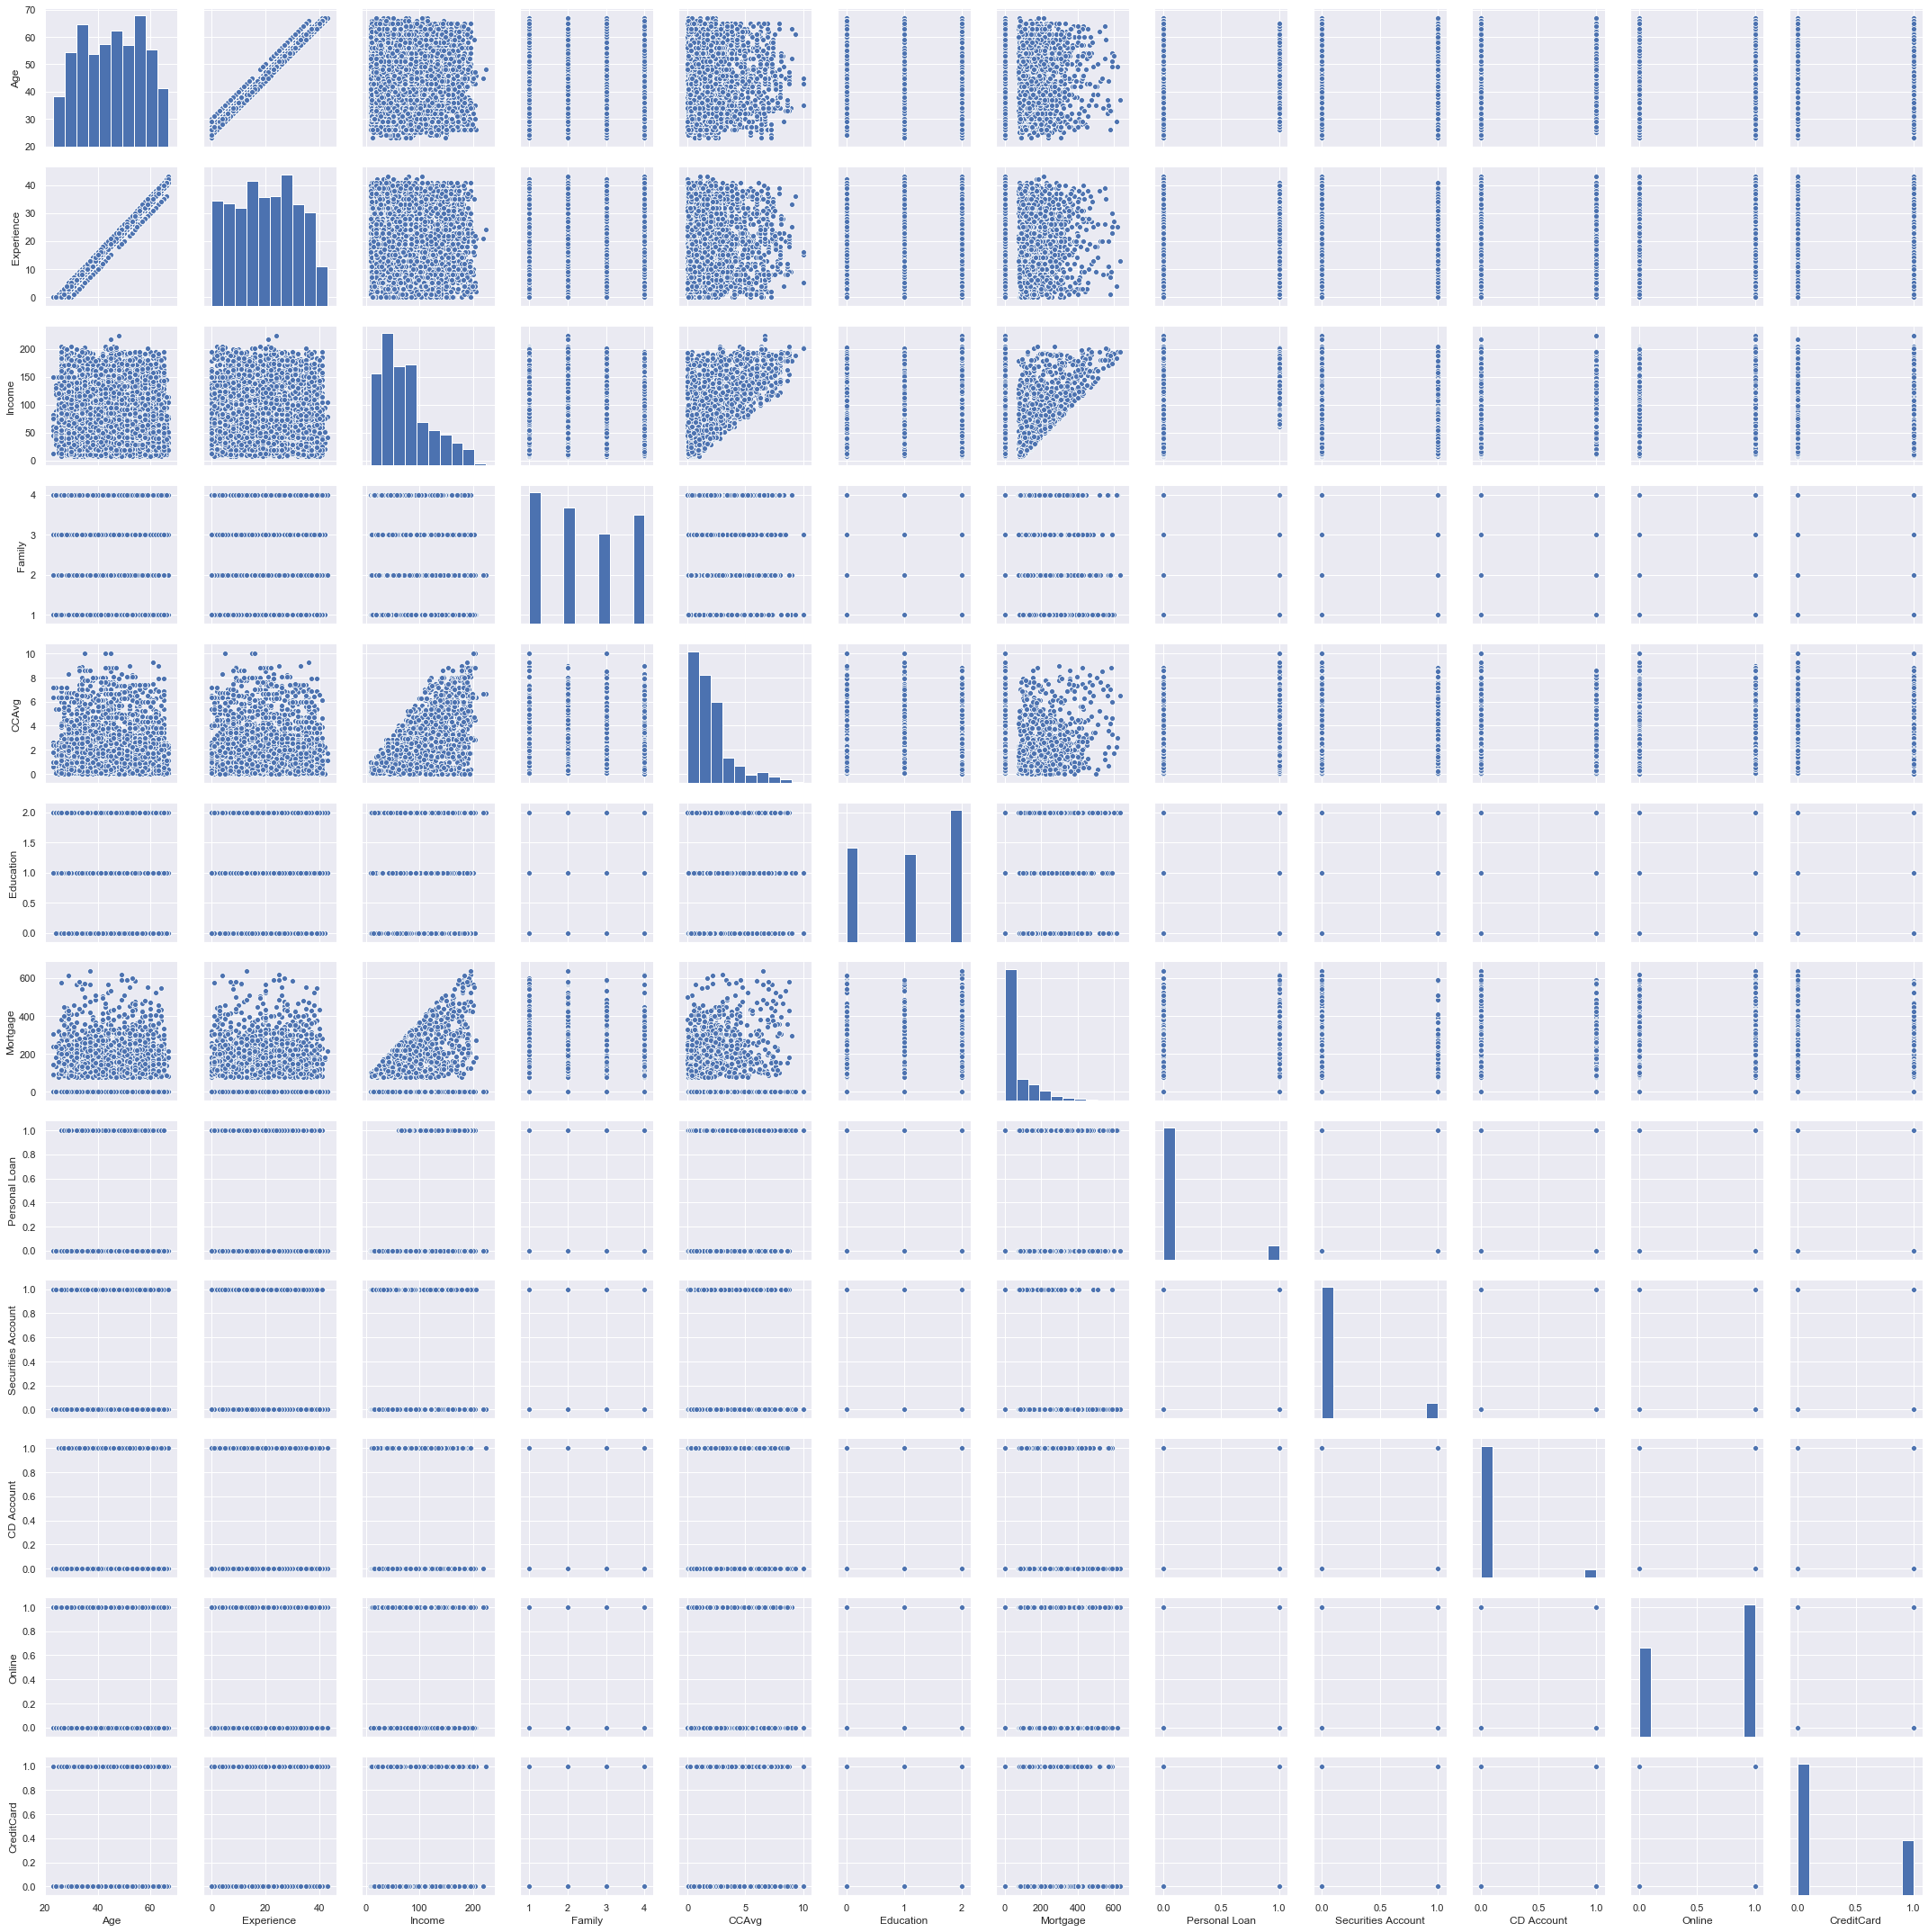

In [24]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
bloan_encoded = copy.deepcopy(bloan)
bloan_encoded.loc[:,['Education', 'Personal Loan', 'Securities Account','CD Account','Online','CreditCard']] = bloan_encoded.loc[:,['Education', 'Personal Loan', 'Securities Account','CD Account','Online','CreditCard']].apply(LabelEncoder().fit_transform) 

sns.pairplot(bloan_encoded)  #pairplot
plt.show()

## 3. Get the target column distribution. Your comments.

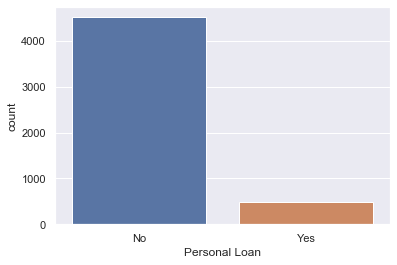

In [25]:
sns.countplot(bloan['Personal Loan'])

In [26]:
print("% of customers accepted to take Personal Loan is ", (len(bloan[bloan['Personal Loan'] =='Yes']['Personal Loan'])/len(bloan['Personal Loan']))*100)
print("No of Customers accepted to take Personal Loan is ",len(bloan[bloan['Personal Loan'] == 'Yes']['Personal Loan']))
print("No of Custoners not accepted to take Personal Loan is ",len(bloan[bloan['Personal Loan'] == 'No']['Personal Loan']))

% of customers accepted to take Personal Loan is  9.6
No of Customers accepted to take Personal Loan is  480
No of Custoners not accepted to take Personal Loan is  4520


### Out of the total 5000 customers, 480 have accepted to take Personal Loan and 4520 have not accepted to take Personal Loan. This translates to 9.6% of customers accepting to take Personal Loan.

## 4. Split the data into training and test set in the ratio of 70:30 respectively

### Creating dummy variables

In [27]:
# To build linear model lets divide the table into dependent and independent variables.
# independant variables
X = bloan_encoded.drop(['Personal Loan'], axis=1)
# the dependent variable
y = bloan_encoded['Personal Loan']

In [28]:
bloan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,No,Yes,No,No,No
1,45,19,34,3,1.5,Undergrad,0,No,Yes,No,No,No
2,39,15,11,1,1.0,Undergrad,0,No,No,No,No,No
3,35,9,100,1,2.7,Graduate,0,No,No,No,No,No
4,35,8,45,4,1.0,Graduate,0,No,No,No,No,Yes


In [29]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## 5. Use different classification models (Logistic, K-NN and Naive Bayes) to predict the likelihood of a liability customer buying personal loans
## 6. Print the Confusion Matrix for all the above models

### Fitting Logistic model

In [30]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5       6  \
0 -0.252591  0.254476  0.050773  0.666026  0.16842 -1.722497  0.0008   

          7         8         9       10  intercept  
0 -0.870998  3.260578 -0.563853 -0.98583  -1.547231  


In [31]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9466666666666667


In [32]:
print(metrics.accuracy_score(y_test, y_predict))

0.9466666666666667


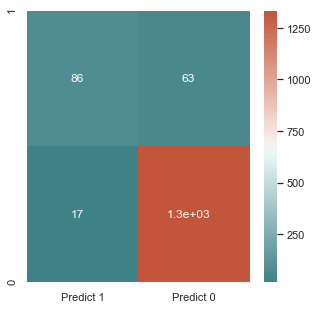

,Predict 1,Predict 0
1,86,63
0,17,1334


In [33]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
ax = sns.heatmap(df_cm,annot=True,cmap=sns.diverging_palette(200, 20, as_cmap=True))
for t in ax.texts[0:2]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
for t in ax.texts[2:4]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,-0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )

plt.show()
df_cm

The confusion matrix

True Positives (TP): we correctly predicted that customer will accept Personal Loan 86

True Negatives (TN): we correctly predicted that customer will not accept Personal Loan 1334

False Positives (FP): we incorrectly predicted that Customer will accept Personal Loan (a "Type I error") 17 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that Customer will not accept Personal Loan (a "Type II error") 63 Falsely predict negative Type II error

In [34]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.58      0.68       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



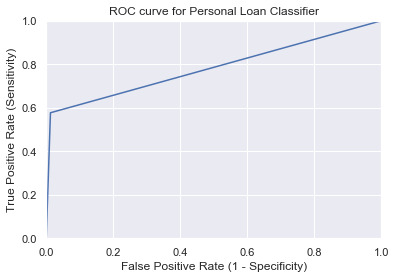

In [35]:
# first argument is true values, second argument is predicted probabilities

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Personal Loan Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Build K-NN Model

In [36]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [37]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### Evaluate performance of K-NN model

In [38]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9093333333333333

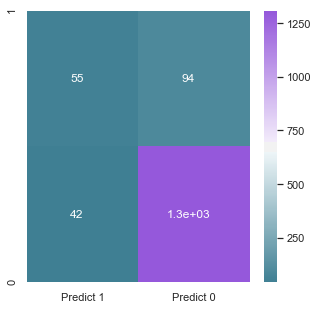

,Predict 1,Predict 0
1,55,94
0,42,1309


In [39]:
knn_cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

knn_df_cm = pd.DataFrame(knn_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
knnax = sns.heatmap(knn_df_cm, annot=True,cmap=sns.diverging_palette(220,1000, as_cmap=True))

for t in knnax.texts[0:2]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
for t in knnax.texts[2:4]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,-0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )

plt.show()

knn_df_cm

The confusion matrix

True Positives (TP): we correctly predicted that customer will accept Personal Loan 54

True Negatives (TN): we correctly predicted that customer will not accept Personal Loan 1309

False Positives (FP): we incorrectly predicted that Customer will accept Personal Loan (a "Type I error") 42 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that Customer will not accept Personal Loan (a "Type II error") 94 Falsely predict negative Type II error

In [40]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.37      0.45       149
           0       0.93      0.97      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.75      0.67      0.70      1500
weighted avg       0.90      0.91      0.90      1500



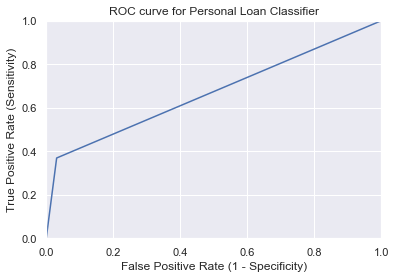

In [41]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

kfpr, ktpr, kthresholds = metrics.roc_curve(y_test, predicted_labels)
plt.plot(kfpr, ktpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Personal Loan Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Naive Bayes Algorithm

In [42]:
loan_model = GaussianNB()

loan_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### Performance of our model with training data

In [43]:
loan_train_predict = loan_model.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy: 0.8900



#### Performance of our model with testing data

In [44]:
loan_test_predict = loan_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy: 0.8747



### Confusion matrix

Confusion Matrix


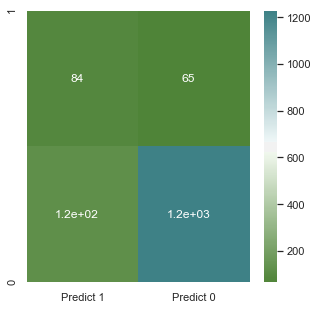

,Predict 1,Predict 0
1,84,65
0,123,1228


In [45]:
print("Confusion Matrix")
nb_cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

nb_df_cm = pd.DataFrame(nb_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,5))
nbax = sns.heatmap(nb_df_cm, annot=True,cmap=sns.diverging_palette(1200,20000, as_cmap=True))

for t in nbax.texts[0:2]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
for t in nbax.texts[2:4]:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.05,-0.25,matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )

plt.show()

nb_df_cm

The confusion matrix

True Positives (TP): we correctly predicted that customer will accept Personal Loan 84

True Negatives (TN): we correctly predicted that customer will not accept Personal Loan 1228

False Positives (FP): we incorrectly predicted that Customer will accept Personal Loan (a "Type I error") 123 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that Customer will not accept Personal Loan (a "Type II error") 65 Falsely predict negative Type II error

In [46]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



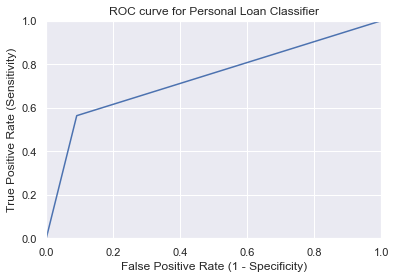

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

nbfpr, nbtpr, nbthresholds = metrics.roc_curve(y_test, loan_test_predict)
plt.plot(nbfpr, nbtpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Personal Loan Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## 7. Give your reasoning on which is the best model in this case and why it performs better? 

### The logistic regression is the best model in this case because of the following metrics
### 1. The accuracy is high for the model which is 95% i.e., the model correctly predicts 95% of the times whether the customer will accept or not accept the Personal Loan.
### 2. The precision and recall is also high for logistic regression.